# Comparison between Padé approximations and Garrappa algorithms for computing the Mittag-Leffler function

This notebook explores the differences between using the Padé approximations and Garrappa's algorithm for computing the Mittag-Leffler function.
- Padé vs Garrappa Fractional Maxwell Gel
- Padé vs Garrappa Fractional Maxwell Liquid
- Padé vs Garrappa Fractional Maxwell

## Fractional Maxwell Gel (Pade32 vs Garrappa)

/m/scicomp/software/anaconda-ci/aalto-ubuntu2004-anaconda/software/anaconda/2023-04/e0d50272/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/m/scicomp/software/anaconda-ci/aalto-ubuntu2004-anaconda/software/anaconda/2023-04/e0d50272/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


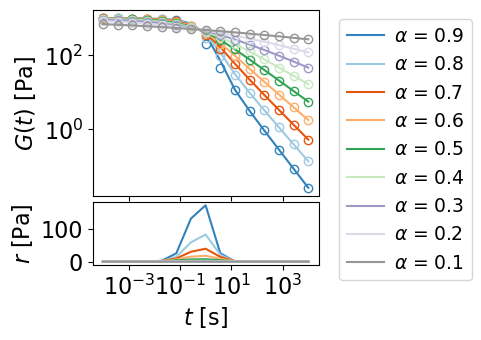

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from pyRheo.relaxation_evaluator import RelaxationEvaluator

# Parameters
model = "FractionalMaxwellGel"

# Define parameters
V = 1000  # Quasi-modulus (Pa*s^alpha)
G_s = 1000  # Viscosity (Pa*s)
time = np.logspace(-4, 4, 15)  # Time array from 0.01s to 100s

# alpha values to plot
alpha_values = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
cmap = cm.tab20c

# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5.0, 3.5), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

# Plot main responses on the top plot (ax1)
for i, alpha in enumerate(alpha_values):
    # Compute the response for each alpha using E_alpha_beta
    params = [V, G_s, alpha]
    evaluator = RelaxationEvaluator(model=model) 

    # Select a color from the plasma colormap
    color = cmap(i / len(alpha_values))  # Scale the color index

    stress_relaxation_garrappa = evaluator.compute_model(params, time, mittag_leffler_type="Garrappa")
    ax1.plot(time, stress_relaxation_garrappa, "-", color=color, label=f'$\\alpha$ = {alpha}')
    
    # Compute the response for each alpha using R_alpha_beta_m_n
    stress_relaxation_pade = evaluator.compute_model(params, time, mittag_leffler_type="Pade32")
    ax1.plot(time, stress_relaxation_pade, "o", color=color, fillstyle="none", markersize=6)

# Plot residuals on the bottom plot (ax2)
for i, alpha in enumerate(alpha_values):
    # Compute residual and plot it
    params = [V, G_s, alpha]
    evaluator = RelaxationEvaluator(model=model) 

    # Select a color from the plasma colormap
    color = cmap(i / len(alpha_values))  # Scale the color index
    
    stress_relaxation_residual = (np.absolute(
        evaluator.compute_model(params, time, mittag_leffler_type="Garrappa") - 
        evaluator.compute_model(params, time, mittag_leffler_type="Pade32")))
    ax2.plot(time, stress_relaxation_residual, "-", color=color)

# Customize the top plot (ax1)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel(r'$G(t)$ [Pa]', fontsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.legend(fontsize=13.5, handletextpad=0.5, loc='upper left', bbox_to_anchor=(1.05, 1))
#ax1.grid(False, which='both', linestyle='--', linewidth=0.5)

# Customize the bottom plot (ax2)
ax2.set_xscale('log')
ax2.set_yscale('linear')
ax2.set_xlabel(r'$t$ [s]', fontsize=16)
ax2.set_ylabel('$r$ [Pa]', fontsize=16)
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
#ax2.grid(False, which='both', linestyle='--', linewidth=0.5)

# Layout adjustments
plt.tight_layout()
plt.subplots_adjust(hspace=0.05)  # Adjust space between subplots
plt.show()

## Fractional Maxwell Gel (Pade54 vs Garrappa)

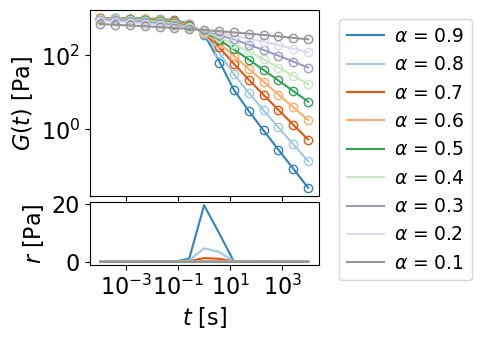

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from pyRheo.relaxation_evaluator import RelaxationEvaluator

# Parameters
model = "FractionalMaxwellGel"

# Define parameters
V = 1000  # Quasi-modulus (Pa*s^alpha)
G_s = 1000  # Viscosity (Pa*s)
time = np.logspace(-4, 4, 15)  # Time array from 0.01s to 100s

# alpha values to plot
alpha_values = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
cmap = cm.tab20c

# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5.0, 3.5), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

# Plot main responses on the top plot (ax1)
for i, alpha in enumerate(alpha_values):
    # Compute the response for each alpha using E_alpha_beta
    params = [V, G_s, alpha]
    evaluator = RelaxationEvaluator(model=model) 

    # Select a color from the plasma colormap
    color = cmap(i / len(alpha_values))  # Scale the color index
    
    stress_relaxation_garrappa = evaluator.compute_model(params, time, mittag_leffler_type="Garrappa")
    ax1.plot(time, stress_relaxation_garrappa, "-", color=color, label=f'$\\alpha$ = {alpha}')
    
    # Compute the response for each alpha using R_alpha_beta_m_n
    stress_relaxation_pade = evaluator.compute_model(params, time, mittag_leffler_type="Pade54")
    ax1.plot(time, stress_relaxation_pade, "o", color=color, fillstyle="none", markersize=6)

# Plot residuals on the bottom plot (ax2)
for i, alpha in enumerate(alpha_values):
    params = [V, G_s, alpha]
    evaluator = RelaxationEvaluator(model=model) 

    # Select a color from the plasma colormap
    color = cmap(i / len(alpha_values))  # Scale the color index
    
    # Compute residual and plot it
    stress_relaxation_residual = (np.absolute(
        evaluator.compute_model(params, time, mittag_leffler_type="Garrappa") - 
        evaluator.compute_model(params, time, mittag_leffler_type="Pade54")))
    ax2.plot(time, stress_relaxation_residual, "-", color=color)

# Customize the top plot (ax1)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel(r'$G(t)$ [Pa]', fontsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.legend(fontsize=13.5, handletextpad=0.5, loc='upper left', bbox_to_anchor=(1.05, 1))
#ax1.grid(False, which='both', linestyle='--', linewidth=0.5)

# Customize the bottom plot (ax2)
ax2.set_xscale('log')
ax2.set_yscale('linear')
ax2.set_xlabel(r'$t$ [s]', fontsize=16)
ax2.set_ylabel('$r$ [Pa]', fontsize=16)
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
#ax2.grid(False, which='both', linestyle='--', linewidth=0.5)

# Layout adjustments
plt.tight_layout()
plt.subplots_adjust(hspace=0.05)  # Adjust space between subplots
plt.show()

## Fractional Maxwell Gel (Pade63 vs Garrappa)

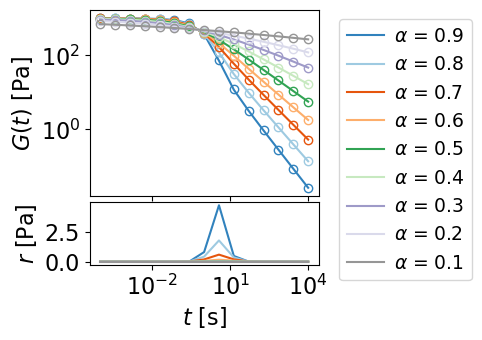

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from pyRheo.relaxation_evaluator import RelaxationEvaluator

# Parameters
model = "FractionalMaxwellGel"

# Define parameters
V = 1000  # Quasi-modulus (Pa*s^alpha)
G_s = 1000  # Viscosity (Pa*s)
time = np.logspace(-4, 4, 15)  # Time array from 0.01s to 100s

# alpha values to plot
alpha_values = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
cmap = cm.tab20c


# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5.0, 3.5), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

# Plot main responses on the top plot (ax1)
for i, alpha in enumerate(alpha_values):
    # Compute the response for each alpha using E_alpha_beta
    params = [V, G_s, alpha]
    evaluator = RelaxationEvaluator(model=model) 

    # Select a color from the plasma colormap
    color = cmap(i / len(alpha_values))  # Scale the color index

    stress_relaxation_garrappa = evaluator.compute_model(params, time, mittag_leffler_type="Garrappa")
    ax1.plot(time, stress_relaxation_garrappa, "-", color=color, label=f'$\\alpha$ = {alpha}')
    
    # Compute the response for each alpha using R_alpha_beta_m_n
    stress_relaxation_pade = evaluator.compute_model(params, time, mittag_leffler_type="Pade63")
    ax1.plot(time, stress_relaxation_pade, "o", color=color, fillstyle="none", markersize=6)

# Plot residuals on the bottom plot (ax2)
for i, alpha in enumerate(alpha_values):
    params = [V, G_s, alpha]
    evaluator = RelaxationEvaluator(model=model) 

    # Select a color from the plasma colormap
    color = cmap(i / len(alpha_values))  # Scale the color index
    
    # Compute residual and plot it
    stress_relaxation_residual = (np.absolute(
        evaluator.compute_model(params, time, mittag_leffler_type="Garrappa") - 
        evaluator.compute_model(params, time, mittag_leffler_type="Pade63")))
    ax2.plot(time, stress_relaxation_residual, "-", color=color)

# Customize the top plot (ax1)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel(r'$G(t)$ [Pa]', fontsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.legend(fontsize=13.5, handletextpad=0.5, loc='upper left', bbox_to_anchor=(1.05, 1))
#ax1.grid(False, which='both', linestyle='--', linewidth=0.5)

# Customize the bottom plot (ax2)
ax2.set_xscale('log')
ax2.set_yscale('linear')
ax2.set_xlabel(r'$t$ [s]', fontsize=16)
ax2.set_ylabel('$r$ [Pa]', fontsize=16)
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
#ax2.grid(False, which='both', linestyle='--', linewidth=0.5)

# Layout adjustments
plt.tight_layout()
plt.subplots_adjust(hspace=0.05)  # Adjust space between subplots
plt.show()

## Fractional Maxwell Gel (Pade72 vs Garrappa)

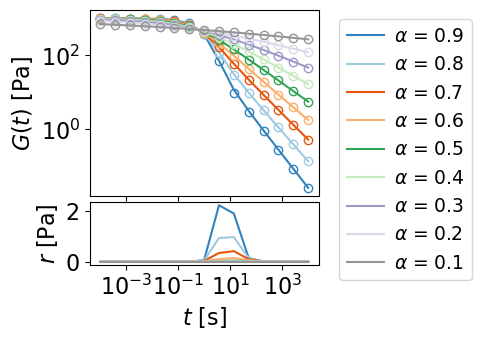

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from pyRheo.relaxation_evaluator import RelaxationEvaluator

# Parameters
model = "FractionalMaxwellGel"

# Define parameters
V = 1000  # Quasi-modulus (Pa*s^alpha)
G_s = 1000  # Viscosity (Pa*s)
time = np.logspace(-4, 4, 15)  # Time array from 0.01s to 100s

# alpha values to plot
alpha_values = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
cmap = cm.tab20c


# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5.0, 3.5), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

# Plot main responses on the top plot (ax1)
for i, alpha in enumerate(alpha_values):
    # Compute the response for each alpha using E_alpha_beta
    params = [V, G_s, alpha]
    evaluator = RelaxationEvaluator(model=model) 

    # Select a color from the plasma colormap
    color = cmap(i / len(alpha_values))  # Scale the color index
    
    stress_relaxation_garrappa = evaluator.compute_model(params, time, mittag_leffler_type="Garrappa")
    ax1.plot(time, stress_relaxation_garrappa, "-", color=color, label=f'$\\alpha$ = {alpha}')
    
    # Compute the response for each alpha using R_alpha_beta_m_n
    stress_relaxation_pade = evaluator.compute_model(params, time, mittag_leffler_type="Pade72")
    ax1.plot(time, stress_relaxation_pade, "o", color=color, fillstyle="none", markersize=6)

# Plot residuals on the bottom plot (ax2)
for i, alpha in enumerate(alpha_values):
    params = [V, G_s, alpha]
    evaluator = RelaxationEvaluator(model=model) 

    # Select a color from the plasma colormap
    color = cmap(i / len(alpha_values))  # Scale the color index

    
    # Compute residual and plot it
    stress_relaxation_residual = (np.absolute(
        evaluator.compute_model(params, time, mittag_leffler_type="Garrappa") - 
        evaluator.compute_model(params, time, mittag_leffler_type="Pade72")))
    ax2.plot(time, stress_relaxation_residual, "-", color=color)

# Customize the top plot (ax1)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel(r'$G(t)$ [Pa]', fontsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.legend(fontsize=13.5, handletextpad=0.5, loc='upper left', bbox_to_anchor=(1.05, 1))
#ax1.grid(False, which='both', linestyle='--', linewidth=0.5)

# Customize the bottom plot (ax2)
ax2.set_xscale('log')
ax2.set_yscale('linear')
ax2.set_xlabel(r'$t$ [s]', fontsize=16)
ax2.set_ylabel('$r$ [Pa]', fontsize=16)
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
#ax2.grid(False, which='both', linestyle='--', linewidth=0.5)

# Layout adjustments
plt.tight_layout()
plt.subplots_adjust(hspace=0.05)  # Adjust space between subplots
plt.show()

## Fractional Maxwell Liquid (Pade32 vs Garrappa)

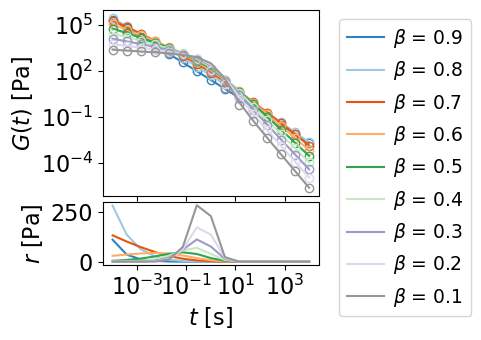

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from pyRheo.relaxation_evaluator import RelaxationEvaluator

# Parameters
model = "FractionalMaxwellLiquid"

# Define parameters
G = 1000  # Quasi-modulus (Pa*s^beta)
eta_s = 1000  # Viscosity (Pa*s)
time = np.logspace(-4, 4, 15)  # Time array from 0.01s to 100s

# beta values to plot
beta_values = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
cmap = cm.tab20c


# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5.0, 3.5), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

# Plot main responses on the top plot (ax1)
for i, beta in enumerate(beta_values):
    # Compute the response for each beta using E_alpha_beta
    params = [G, eta_s, beta]
    evaluator = RelaxationEvaluator(model=model) 

    # Select a color from the plasma colormap
    color = cmap(i / len(alpha_values))  # Scale the color index
    
    stress_relaxation_garrappa = evaluator.compute_model(params, time, mittag_leffler_type="Garrappa")
    ax1.plot(time, stress_relaxation_garrappa, "-", color=color, label=f'$\\beta$ = {beta}')
    
    # Compute the response for each beta using R_alpha_beta_m_n
    stress_relaxation_pade = evaluator.compute_model(params, time, mittag_leffler_type="Pade32")
    ax1.plot(time, stress_relaxation_pade, "o", color=color, fillstyle="none", markersize=6)

# Plot residuals on the bottom plot (ax2)
for i, beta in enumerate(beta_values):
    params = [G, eta_s, beta]
    evaluator = RelaxationEvaluator(model=model) 

    # Select a color from the plasma colormap
    color = cmap(i / len(alpha_values))  # Scale the color index
    
    
    # Compute residual and plot it
    stress_relaxation_residual = (np.absolute(
        evaluator.compute_model(params, time, mittag_leffler_type="Garrappa") - 
        evaluator.compute_model(params, time, mittag_leffler_type="Pade32")))
    ax2.plot(time, stress_relaxation_residual, "-", color=color)

# Customize the top plot (ax1)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel(r'$G(t)$ [Pa]', fontsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.legend(fontsize=13.5, handletextpad=0.5, loc='upper left', bbox_to_anchor=(1.05, 1))
#ax1.grid(False, which='both', linestyle='--', linewidth=0.5)

# Customize the bottom plot (ax2)
ax2.set_xscale('log')
ax2.set_yscale('linear')
ax2.set_xlabel(r'$t$ [s]', fontsize=16)
ax2.set_ylabel('$r$ [Pa]', fontsize=16)
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
#ax2.grid(False, which='both', linestyle='--', linewidth=0.5)

# Layout adjustments
plt.tight_layout()
plt.subplots_adjust(hspace=0.05)  # Adjust space between subplots
plt.show()

## Fractional Maxwell Liquid (Pade54 vs Garrappa)

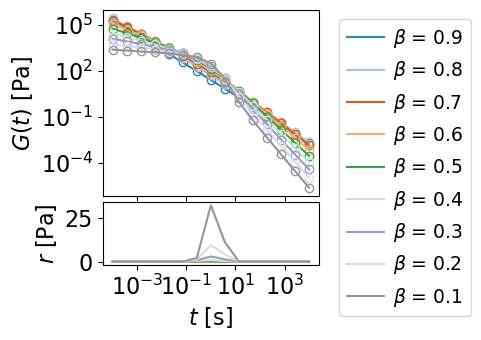

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from pyRheo.relaxation_evaluator import RelaxationEvaluator

# Parameters
model = "FractionalMaxwellLiquid"

# Define parameters
G = 1000  # Quasi-modulus (Pa*s^beta)
eta_s = 1000  # Viscosity (Pa*s)
time = np.logspace(-4, 4, 15)  # Time array from 0.01s to 100s

# beta values to plot
beta_values = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
cmap = cm.tab20c

# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5.0, 3.5), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

# Plot main responses on the top plot (ax1)
for i, beta in enumerate(beta_values):
    # Compute the response for each beta using E_alpha_beta
    params = [G, eta_s, beta]
    evaluator = RelaxationEvaluator(model=model) 

    # Select a color from the plasma colormap
    color = cmap(i / len(alpha_values))  # Scale the color index
    

    stress_relaxation_garrappa = evaluator.compute_model(params, time, mittag_leffler_type="Garrappa")
    ax1.plot(time, stress_relaxation_garrappa, "-", color=color, label=f'$\\beta$ = {beta}')
    
    # Compute the response for each beta using R_alpha_beta_m_n
    stress_relaxation_pade = evaluator.compute_model(params, time, mittag_leffler_type="Pade54")
    ax1.plot(time, stress_relaxation_pade, "o", color=color, fillstyle="none", markersize=6)

# Plot residuals on the bottom plot (ax2)
for i, beta in enumerate(beta_values):
    params = [G, eta_s, beta]
    evaluator = RelaxationEvaluator(model=model) 

    # Select a color from the plasma colormap
    color = cmap(i / len(alpha_values))  # Scale the color index
    
    # Compute residual and plot it
    stress_relaxation_residual = (np.absolute(
        evaluator.compute_model(params, time, mittag_leffler_type="Garrappa") - 
        evaluator.compute_model(params, time, mittag_leffler_type="Pade54")))
    ax2.plot(time, stress_relaxation_residual, "-", color=color)

# Customize the top plot (ax1)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel(r'$G(t)$ [Pa]', fontsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.legend(fontsize=13.5, handletextpad=0.5, loc='upper left', bbox_to_anchor=(1.05, 1))
#ax1.grid(False, which='both', linestyle='--', linewidth=0.5)

# Customize the bottom plot (ax2)
ax2.set_xscale('log')
ax2.set_yscale('linear')
ax2.set_xlabel(r'$t$ [s]', fontsize=16)
ax2.set_ylabel('$r$ [Pa]', fontsize=16)
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
#ax2.grid(False, which='both', linestyle='--', linewidth=0.5)

# Layout adjustments
plt.tight_layout()
plt.subplots_adjust(hspace=0.05)  # Adjust space between subplots
plt.show()

## Fractional Maxwell Liquid (Pade63 vs Garrappa)

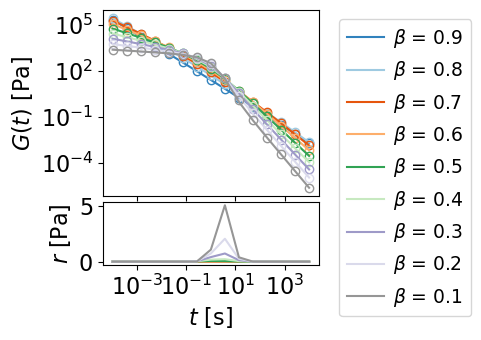

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from pyRheo.relaxation_evaluator import RelaxationEvaluator

# Parameters
model = "FractionalMaxwellLiquid"

# Define parameters
G = 1000  # Quasi-modulus (Pa*s^beta)
eta_s = 1000  # Viscosity (Pa*s)
time = np.logspace(-4, 4, 15)  # Time array from 0.01s to 100s

# beta values to plot
beta_values = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
cmap = cm.tab20c


# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5.0, 3.5), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

# Plot main responses on the top plot (ax1)
for i, beta in enumerate(beta_values):
    # Compute the response for each beta using E_alpha_beta
    params = [G, eta_s, beta]
    evaluator = RelaxationEvaluator(model=model) 

    # Select a color from the plasma colormap
    color = cmap(i / len(alpha_values))  # Scale the color index

    stress_relaxation_garrappa = evaluator.compute_model(params, time, mittag_leffler_type="Garrappa")
    ax1.plot(time, stress_relaxation_garrappa, "-", color=color, label=f'$\\beta$ = {beta}')
    
    # Compute the response for each beta using R_alpha_beta_m_n
    stress_relaxation_pade = evaluator.compute_model(params, time, mittag_leffler_type="Pade63")
    ax1.plot(time, stress_relaxation_pade, "o", color=color, fillstyle="none", markersize=6)

# Plot residuals on the bottom plot (ax2)
for i, beta in enumerate(beta_values):
    params = [G, eta_s, beta]
    evaluator = RelaxationEvaluator(model=model) 

    # Select a color from the plasma colormap
    color = cmap(i / len(alpha_values))  # Scale the color index
    
    # Compute residual and plot it
    stress_relaxation_residual = (np.absolute(
        evaluator.compute_model(params, time, mittag_leffler_type="Garrappa") - 
        evaluator.compute_model(params, time, mittag_leffler_type="Pade63")))
    ax2.plot(time, stress_relaxation_residual, "-", color=color)

# Customize the top plot (ax1)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel(r'$G(t)$ [Pa]', fontsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.legend(fontsize=13.5, handletextpad=0.5, loc='upper left', bbox_to_anchor=(1.05, 1))
#ax1.grid(False, which='both', linestyle='--', linewidth=0.5)

# Customize the bottom plot (ax2)
ax2.set_xscale('log')
ax2.set_yscale('linear')
ax2.set_xlabel(r'$t$ [s]', fontsize=16)
ax2.set_ylabel('$r$ [Pa]', fontsize=16)
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
#ax2.grid(False, which='both', linestyle='--', linewidth=0.5)

# Layout adjustments
plt.tight_layout()
plt.subplots_adjust(hspace=0.05)  # Adjust space between subplots
plt.show()

## Fractional Maxwell Liquid (Pade72 vs Garrappa)

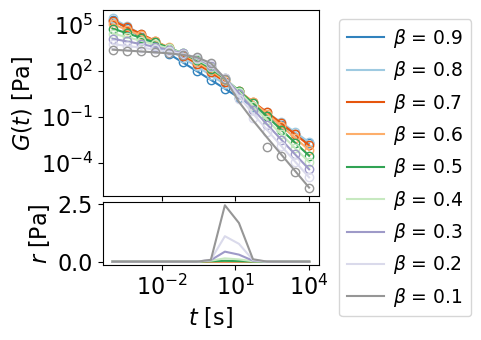

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from pyRheo.relaxation_evaluator import RelaxationEvaluator

# Parameters
model = "FractionalMaxwellLiquid"

# Define parameters
G = 1000  # Quasi-modulus (Pa*s^beta)
eta_s = 1000  # Viscosity (Pa*s)
time = np.logspace(-4, 4, 15)  # Time array from 0.01s to 100s

# beta values to plot
beta_values = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
cmap = cm.tab20c


# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5.0, 3.5), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

# Plot main responses on the top plot (ax1)
for i, beta in enumerate(beta_values):
    # Compute the response for each beta using E_alpha_beta
    params = [G, eta_s, beta]
    evaluator = RelaxationEvaluator(model=model) 

    # Select a color from the plasma colormap
    color = cmap(i / len(alpha_values))  # Scale the color index

    stress_relaxation_garrappa = evaluator.compute_model(params, time, mittag_leffler_type="Garrappa")
    ax1.plot(time, stress_relaxation_garrappa, "-", color=color, label=f'$\\beta$ = {beta}')
    
    # Compute the response for each beta using R_alpha_beta_m_n
    stress_relaxation_pade = evaluator.compute_model(params, time, mittag_leffler_type="Pade72")
    ax1.plot(time, stress_relaxation_pade, "o", color=color, fillstyle="none", markersize=6)

# Plot residuals on the bottom plot (ax2)
for i, beta in enumerate(beta_values):
    params = [G, eta_s, beta]
    evaluator = RelaxationEvaluator(model=model) 

    # Select a color from the plasma colormap
    color = cmap(i / len(alpha_values))  # Scale the color index
    
    # Compute residual and plot it
    stress_relaxation_residual = (np.absolute(
        evaluator.compute_model(params, time, mittag_leffler_type="Garrappa") - 
        evaluator.compute_model(params, time, mittag_leffler_type="Pade72")))
    ax2.plot(time, stress_relaxation_residual, "-", color=color)

# Customize the top plot (ax1)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel(r'$G(t)$ [Pa]', fontsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.legend(fontsize=13.5, handletextpad=0.5, loc='upper left', bbox_to_anchor=(1.05, 1))
#ax1.grid(False, which='both', linestyle='--', linewidth=0.5)

# Customize the bottom plot (ax2)
ax2.set_xscale('log')
ax2.set_yscale('linear')
ax2.set_xlabel(r'$t$ [s]', fontsize=16)
ax2.set_ylabel('$r$ [Pa]', fontsize=16)
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
#ax2.grid(False, which='both', linestyle='--', linewidth=0.5)

# Layout adjustments
plt.tight_layout()
plt.subplots_adjust(hspace=0.05)  # Adjust space between subplots
plt.show()

## Fractional Maxwell (Pade32 vs Garrappa)

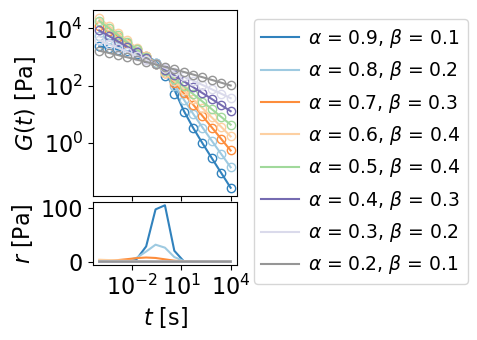

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from pyRheo.relaxation_evaluator import RelaxationEvaluator

# Parameters
model = "FractionalMaxwell"

# Define parameters
G = 1000  # Quasi-modulus (Pa*s^beta)
V = 1000  # Quasi-modulus (Pa*s^alpha)
time = np.logspace(-4, 4, 15)  # Time array from 0.01s to 100s

# alpha and beta values to plot
alpha_values = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]
beta_values = [0.1, 0.2, 0.3, 0.4, 0.4, 0.3, 0.2, 0.1]
cmap = cm.tab20c


# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5.0, 3.5), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

# Plot main responses on the top plot (ax1)
for i, (alpha, beta) in enumerate(zip(alpha_values, beta_values)):    # Compute the response for each beta
    # Compute the response for each beta using E_alpha_beta
    params = [G, V, alpha, beta]
    evaluator = RelaxationEvaluator(model=model) 

    # Select a color from the plasma colormap
    color = cmap(i / len(alpha_values))  # Scale the color index

    stress_relaxation_garrappa = evaluator.compute_model(params, time, mittag_leffler_type="Garrappa")
    ax1.plot(time, stress_relaxation_garrappa, "-", color=color, label=f'$\\alpha$ = {alpha}, $\\beta$ = {beta}')
    
    # Compute the response for each beta using R_alpha_beta_m_n
    stress_relaxation_pade = evaluator.compute_model(params, time, mittag_leffler_type="Pade32")
    ax1.plot(time, stress_relaxation_pade, "o", color=color, fillstyle="none", markersize=6)

# Plot residuals on the bottom plot (ax2)
for i, (alpha, beta) in enumerate(zip(alpha_values, beta_values)):    # Compute the response for each beta
    params = [G, V, alpha, beta]
    evaluator = RelaxationEvaluator(model=model) 

    # Select a color from the plasma colormap
    color = cmap(i / len(alpha_values))  # Scale the color index
    
    # Compute residual and plot it
    stress_relaxation_residual = (np.absolute(
        evaluator.compute_model(params, time, mittag_leffler_type="Garrappa") - 
        evaluator.compute_model(params, time, mittag_leffler_type="Pade32")))
    ax2.plot(time, stress_relaxation_residual, "-", color=color)

# Customize the top plot (ax1)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel(r'$G(t)$ [Pa]', fontsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.legend(fontsize=13.5, handletextpad=0.5, loc='upper left', bbox_to_anchor=(1.05, 1))
#ax1.grid(False, which='both', linestyle='--', linewidth=0.5)

# Customize the bottom plot (ax2)
ax2.set_xscale('log')
ax2.set_yscale('linear')
ax2.set_xlabel(r'$t$ [s]', fontsize=16)
ax2.set_ylabel('$r$ [Pa]', fontsize=16)
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
#ax2.grid(False, which='both', linestyle='--', linewidth=0.5)

# Layout adjustments
plt.tight_layout()
plt.subplots_adjust(hspace=0.05)  # Adjust space between subplots
plt.show()

## Fractional Maxwell (Pade54 vs Garrappa)

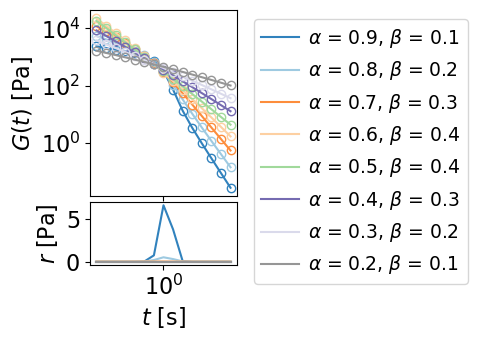

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from pyRheo.relaxation_evaluator import RelaxationEvaluator

# Parameters
model = "FractionalMaxwell"

# Define parameters
G = 1000  # Quasi-modulus (Pa*s^beta)
V = 1000  # Quasi-modulus (Pa*s^alpha)
time = np.logspace(-4, 4, 15)  # Time array from 0.01s to 100s

# alpha and beta values to plot
alpha_values = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]
beta_values = [0.1, 0.2, 0.3, 0.4, 0.4, 0.3, 0.2, 0.1]
cmap = cm.tab20c


# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5.0, 3.5), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

# Plot main responses on the top plot (ax1)
for i, (alpha, beta) in enumerate(zip(alpha_values, beta_values)):    # Compute the response for each beta
    # Compute the response for each beta using E_alpha_beta
    params = [G, V, alpha, beta]
    evaluator = RelaxationEvaluator(model=model) 

    # Select a color from the plasma colormap
    color = cmap(i / len(alpha_values))  # Scale the color index

    stress_relaxation_garrappa = evaluator.compute_model(params, time, mittag_leffler_type="Garrappa")
    ax1.plot(time, stress_relaxation_garrappa, "-", color=color, label=f'$\\alpha$ = {alpha}, $\\beta$ = {beta}')
    
    # Compute the response for each beta using R_alpha_beta_m_n
    stress_relaxation_pade = evaluator.compute_model(params, time, mittag_leffler_type="Pade54")
    ax1.plot(time, stress_relaxation_pade, "o", color=color, fillstyle="none", markersize=6)

# Plot residuals on the bottom plot (ax2)
for i, (alpha, beta) in enumerate(zip(alpha_values, beta_values)):    # Compute the response for each beta
    params = [G, V, alpha, beta]
    evaluator = RelaxationEvaluator(model=model) 

    # Select a color from the plasma colormap
    color = cmap(i / len(alpha_values))  # Scale the color index
    
    # Compute residual and plot it
    stress_relaxation_residual = (np.absolute(
        evaluator.compute_model(params, time, mittag_leffler_type="Garrappa") - 
        evaluator.compute_model(params, time, mittag_leffler_type="Pade54")))
    ax2.plot(time, stress_relaxation_residual, "-", color=color)

# Customize the top plot (ax1)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel(r'$G(t)$ [Pa]', fontsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.legend(fontsize=13.5, handletextpad=0.5, loc='upper left', bbox_to_anchor=(1.05, 1))
#ax1.grid(False, which='both', linestyle='--', linewidth=0.5)

# Customize the bottom plot (ax2)
ax2.set_xscale('log')
ax2.set_yscale('linear')
ax2.set_xlabel(r'$t$ [s]', fontsize=16)
ax2.set_ylabel('$r$ [Pa]', fontsize=16)
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
#ax2.grid(False, which='both', linestyle='--', linewidth=0.5)

# Layout adjustments
plt.tight_layout()
plt.subplots_adjust(hspace=0.05)  # Adjust space between subplots
plt.show()

## Fractional Maxwell (Pade63 vs Garrappa)

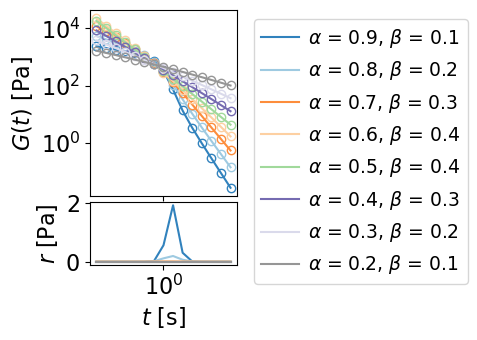

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from pyRheo.relaxation_evaluator import RelaxationEvaluator

# Parameters
model = "FractionalMaxwell"

# Define parameters
G = 1000  # Quasi-modulus (Pa*s^beta)
V = 1000  # Quasi-modulus (Pa*s^alpha)
time = np.logspace(-4, 4, 15)  # Time array from 0.01s to 100s

# alpha and beta values to plot
alpha_values = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]
beta_values = [0.1, 0.2, 0.3, 0.4, 0.4, 0.3, 0.2, 0.1]
cmap = cm.tab20c


# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5.0, 3.5), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

# Plot main responses on the top plot (ax1)
for i, (alpha, beta) in enumerate(zip(alpha_values, beta_values)):    # Compute the response for each beta
    # Compute the response for each beta using E_alpha_beta
    params = [G, V, alpha, beta]
    evaluator = RelaxationEvaluator(model=model) 

    # Select a color from the plasma colormap
    color = cmap(i / len(alpha_values))  # Scale the color index

    stress_relaxation_garrappa = evaluator.compute_model(params, time, mittag_leffler_type="Garrappa")
    ax1.plot(time, stress_relaxation_garrappa, "-", color=color, label=f'$\\alpha$ = {alpha}, $\\beta$ = {beta}')
    
    # Compute the response for each beta using R_alpha_beta_m_n
    stress_relaxation_pade = evaluator.compute_model(params, time, mittag_leffler_type="Pade63")
    ax1.plot(time, stress_relaxation_pade, "o", color=color, fillstyle="none", markersize=6)

# Plot residuals on the bottom plot (ax2)
for i, (alpha, beta) in enumerate(zip(alpha_values, beta_values)):    # Compute the response for each beta
    params = [G, V, alpha, beta]
    evaluator = RelaxationEvaluator(model=model) 

    # Select a color from the plasma colormap
    color = cmap(i / len(alpha_values))  # Scale the color index
    
    # Compute residual and plot it
    stress_relaxation_residual = (np.absolute(
        evaluator.compute_model(params, time, mittag_leffler_type="Garrappa") - 
        evaluator.compute_model(params, time, mittag_leffler_type="Pade63")))
    ax2.plot(time, stress_relaxation_residual, "-", color=color)

# Customize the top plot (ax1)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel(r'$G(t)$ [Pa]', fontsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.legend(fontsize=13.5, handletextpad=0.5, loc='upper left', bbox_to_anchor=(1.05, 1))
#ax1.grid(False, which='both', linestyle='--', linewidth=0.5)

# Customize the bottom plot (ax2)
ax2.set_xscale('log')
ax2.set_yscale('linear')
ax2.set_xlabel(r'$t$ [s]', fontsize=16)
ax2.set_ylabel('$r$ [Pa]', fontsize=16)
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
#ax2.grid(False, which='both', linestyle='--', linewidth=0.5)

# Layout adjustments
plt.tight_layout()
plt.subplots_adjust(hspace=0.05)  # Adjust space between subplots
plt.show()

## Fractional Maxwell (Pade72 vs Garrappa)

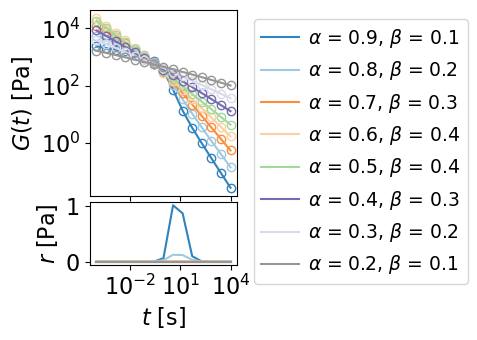

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from pyRheo.relaxation_evaluator import RelaxationEvaluator

# Parameters
model = "FractionalMaxwell"

# Define parameters
G = 1000  # Quasi-modulus (Pa*s^beta)
V = 1000  # Quasi-modulus (Pa*s^alpha)
time = np.logspace(-4, 4, 15)  # Time array from 0.01s to 100s

# alpha and beta values to plot
alpha_values = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]
beta_values = [0.1, 0.2, 0.3, 0.4, 0.4, 0.3, 0.2, 0.1]
cmap = cm.tab20c


# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5.0, 3.5), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

# Plot main responses on the top plot (ax1)
for i, (alpha, beta) in enumerate(zip(alpha_values, beta_values)):    # Compute the response for each beta
    # Compute the response for each beta using E_alpha_beta
    params = [G, V, alpha, beta]
    evaluator = RelaxationEvaluator(model=model) 

    # Select a color from the plasma colormap
    color = cmap(i / len(alpha_values))  # Scale the color index

    stress_relaxation_garrappa = evaluator.compute_model(params, time, mittag_leffler_type="Garrappa")
    ax1.plot(time, stress_relaxation_garrappa, "-", color=color, label=f'$\\alpha$ = {alpha}, $\\beta$ = {beta}')
    
    # Compute the response for each beta using R_alpha_beta_m_n
    stress_relaxation_pade = evaluator.compute_model(params, time, mittag_leffler_type="Pade72")
    ax1.plot(time, stress_relaxation_pade, "o", color=color, fillstyle="none", markersize=6)

# Plot residuals on the bottom plot (ax2)
for i, (alpha, beta) in enumerate(zip(alpha_values, beta_values)):    # Compute the response for each beta
    params = [G, V, alpha, beta]
    evaluator = RelaxationEvaluator(model=model) 

    # Select a color from the plasma colormap
    color = cmap(i / len(alpha_values))  # Scale the color index
    
    # Compute residual and plot it
    stress_relaxation_residual = (np.absolute(
        evaluator.compute_model(params, time, mittag_leffler_type="Garrappa") - 
        evaluator.compute_model(params, time, mittag_leffler_type="Pade72")))
    ax2.plot(time, stress_relaxation_residual, "-", color=color)

# Customize the top plot (ax1)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel(r'$G(t)$ [Pa]', fontsize=16)
ax1.tick_params(axis='y', labelsize=16)
ax1.legend(fontsize=13.5, handletextpad=0.5, loc='upper left', bbox_to_anchor=(1.05, 1))
#ax1.grid(False, which='both', linestyle='--', linewidth=0.5)

# Customize the bottom plot (ax2)
ax2.set_xscale('log')
ax2.set_yscale('linear')
ax2.set_xlabel(r'$t$ [s]', fontsize=16)
ax2.set_ylabel('$r$ [Pa]', fontsize=16)
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
#ax2.grid(False, which='both', linestyle='--', linewidth=0.5)

# Layout adjustments
plt.tight_layout()
plt.subplots_adjust(hspace=0.05)  # Adjust space between subplots
plt.show()